### Electric Vehicle Population data
#### This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). Data was downloaded in May from https://catalog.data.gov/dataset/electric-vehicle-population-data. This dataset is updated every month.

#### Import libraries and its dependencies.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Load data in pandas

In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data_2.csv")
# Show the first few rows
df

VIN (1-10)     County       City State  Postal Code  Model Year  \
0       5YJ3E1EB6K       King    Seattle    WA      98178.0        2019   
1       5YJYGAEE5M     Yakima      Selah    WA      98942.0        2021   
2       5YJSA1E65N     Yakima    Granger    WA      98932.0        2022   
3       5YJ3E1EBXN       King   Bellevue    WA      98004.0        2022   
4       JM3KKEHA8S   Thurston       Yelm    WA      98597.0        2025   
...            ...        ...        ...   ...          ...         ...   
246132  WVGTMPE29M   Thurston    Olympia    WA      98513.0        2021   
246133  7G2CEHED7R       King    Redmond    WA      98053.0        2024   
246134  1G1RC6S54H     Benton  Kennewick    WA      99337.0        2017   
246135  KNDPZDDH0R  Snohomish    Edmonds    WA      98026.0        2024   
246136  1N4BZ1DV6M     Pierce   Lakewood    WA      98498.0        2021   

              Make       Model                   Electric Vehicle Type  \
0            TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
1            TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
2            TESLA     MODEL S          Battery Electric Vehicle (BEV)   
3            TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
4            MAZDA       CX-90  Plug-in Hybrid Electric Vehicle (PHEV)   
...            ...         ...                                     ...   
246132  VOLKSWAGEN        ID.4          Battery Electric Vehicle (BEV)   
246133       TESLA  CYBERTRUCK          Battery Electric Vehicle (BEV)   
246134   CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
246135         KIA    SPORTAGE  Plug-in Hybrid Electric Vehicle (PHEV)   
246136      NISSAN        LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible           220.0   
1       Eligibility unknown as battery range has not b...             0.0   
2       Eligibility unknown as battery range has not b...             0.0   
3       Eligibility unknown as battery range has not b...             0.0   
4                   Not eligible due to low battery range            26.0   
...                                                   ...             ...   
246132  Eligibility unknown as battery range has not b...             0.0   
246133  Eligibility unknown as battery range has not b...             0.0   
246134            Clean Alternative Fuel Vehicle Eligible            53.0   
246135            Clean Alternative Fuel Vehicle Eligible            34.0   
246136  Eligibility unknown as battery range has not b...             0.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  37.0       101250425   
1             0.0                  15.0       224162858   
2             0.0                  15.0       187279214   
3             0.0                  41.0       219428079   
4             0.0                   2.0       277791643   
...           ...                   ...             ...   
246132        0.0                   2.0       209653335   
246133        0.0                  45.0       277261365   
246134        0.0                   8.0       132573318   
246135        0.0                  21.0       261327433   
246136        0.0                  28.0       258115413   

                   Vehicle Location  \
0       POINT (-122.23825 47.49461)   
1       POINT (-120.53145 46.65405)   
2        POINT (-120.1871 46.33949)   
3        POINT (-122.1872 47.61001)   
4       POINT (-122.60735 46.94239)   
...                             ...   
246132  POINT (-122.81754 46.98876)   
246133  POINT (-122.03287 47.68555)   
246134  POINT (-119.14482 46.18764)   
246135  POINT (-122.31768 47.87166)   
246136  POINT (-122.54764 47.17669)   

                                         Electric Utility  2020 Census Tract  
0            CITY OF SEATTLE - (WA)|

#### Data preparation & Cleaning

In [3]:
df.shape

(246137, 17)

#### There are a total of 17 columns & 246137 rows in the dataset

#### Now check the first five rows in the dataset using df.head(5)

In [4]:
df.head(5)

VIN (1-10)    County      City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB6K      King   Seattle    WA      98178.0        2019  TESLA   
1  5YJYGAEE5M    Yakima     Selah    WA      98942.0        2021  TESLA   
2  5YJSA1E65N    Yakima   Granger    WA      98932.0        2022  TESLA   
3  5YJ3E1EBXN      King  Bellevue    WA      98004.0        2022  TESLA   
4  JM3KKEHA8S  Thurston      Yelm    WA      98597.0        2025  MAZDA   

     Model                   Electric Vehicle Type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1  MODEL Y          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3  MODEL 3          Battery Electric Vehicle (BEV)   
4    CX-90  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2  Eligibility unknown as battery range has not b...             0.0   
3  Eligibility unknown as battery range has not b...             0.0   
4              Not eligible due to low battery range            26.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  37.0       101250425   
1        0.0                  15.0       224162858   
2        0.0                  15.0       187279214   
3        0.0                  41.0       219428079   
4        0.0                   2.0       277791643   

              Vehicle Location                               Electric Utility  \
0  POINT (-122.23825 47.49461)   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
1  POINT (-120.53145 46.65405)                                     PACIFICORP   
2   POINT (-120.1871 46.33949)                                     PACIFICORP   
3   POINT (-122.1872 47.61001)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   
4  POINT (-122.60735 46.94239)                         PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.303301e+10  
1       5.307700e+10  
2       5.307700e+10  
3       5.303302e+10  
4       5.306701e+10

#### Check the datatypes of all columns using the info() method

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              246137 non-null  object

#### There are 5 float64 columns, 2 int64 columns, and 10 object columns.


#### To check the heading of 17 columns using df.columns

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

#### Identify missing values

In [5]:
missing_values = df.isnull().sum()
missing_values

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

#### There are 8 columns with missing values. (County, City, Postal Code, Electric Range, Base MSRP, Legislative District, Vehicle Location, Electric Utility, 2020 Census Tract)

#### To check the Sumamry statistics of the numerical columns using df.describe()

In [6]:
# sumamry statistics of the data
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  246133.000000  246137.000000   246120.000000  246120.000000   
mean    98179.658481    2021.535698       44.872192     746.606188   
std      2494.101983       2.999144       82.913952    6987.233456   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98375.000000    2024.000000       37.000000       0.000000   
max     99577.000000    2026.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         245597.000000    2.461370e+05       2.461330e+05  
mean              28.871831    2.374324e+08       5.297685e+10  
std               14.895938    6.719158e+07       1.580103e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    2.083391e+08       5.303301e+10  
50%               32.000000    2.548460e+08       5.303303e+10  
75%               42.000000    2.717319e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

#### The top 20 most frequent vehicle models

In [43]:
model_df = df["Model"].value_counts().head(20)
print(model_df)

MODEL Y           51050
MODEL 3           37108
LEAF              13949
MODEL S            7884
BOLT EV            7517
MODEL X            6604
MUSTANG MACH-E     5333
ID.4               5089
WRANGLER           4989
VOLT               4701
IONIQ 5            4346
NIRO               4062
R1S                4041
PACIFICA           3829
RAV4 PRIME         3587
EV6                3572
PRIUS PRIME        3501
F-150              3289
X5                 3132
BOLT EUV           2911
Name: Model, dtype: int64


#### The top 10 models in the dataset

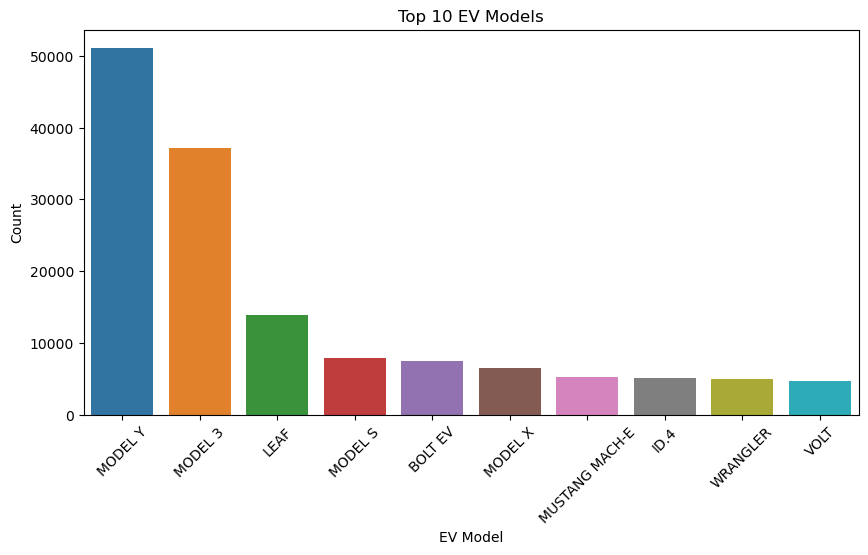

In [9]:
model_df = df["Model"].value_counts().head(10)
model_df

# Plot the top 10 EV models
plt.figure(figsize=(10, 5))
sns.barplot(x=model_df.index, y=model_df.values)

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("EV Model")
plt.ylabel("Count")
plt.title("Top 10 EV Models")
plt.show()

#### Which company makes most of the electric vehicles? or Which manufacturers dominate the EV market?
#### Top 10 vehicle maker

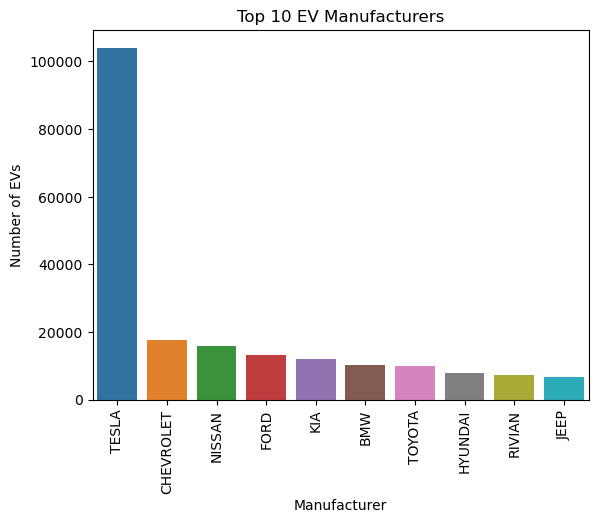

In [10]:
#To find the top manufacturers with the most EVs:
# Count EVs by manufacturer (Make)
top_makes = df["Make"].value_counts().head(10)  # Top 10 manufacturers
# Plot
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.xlabel("Manufacturer")
plt.ylabel("Number of EVs")
plt.title("Top 10 EV Manufacturers")
plt.xticks(rotation=90)
plt.show()

#### Here we can see that Tesla dominate the EV market

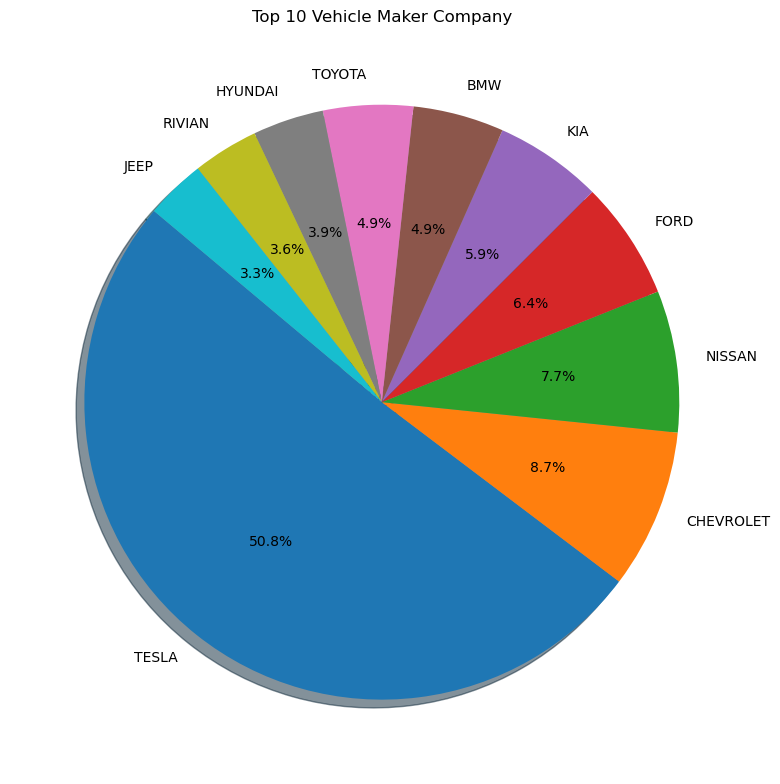

In [12]:
# Get top 10 vehicle makes
top_10_makes = df["Make"].value_counts().nlargest(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_10_makes.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Top 10 Vehicle Maker Company")
plt.ylabel("")  # Optional: remove y-label for cleaner look
plt.tight_layout()
plt.show()

#### Tesla dominates the EV market with a substantial 51 % share, followed by Chevrolet (8.7%), Nissan (7.7%), Ford (6.4%), Kia (5.9%), BMW (4.9%), and Toyota (4.9%), highlighting Tesla's clear lead over other major automakers.

<Axes: ylabel='Model'>

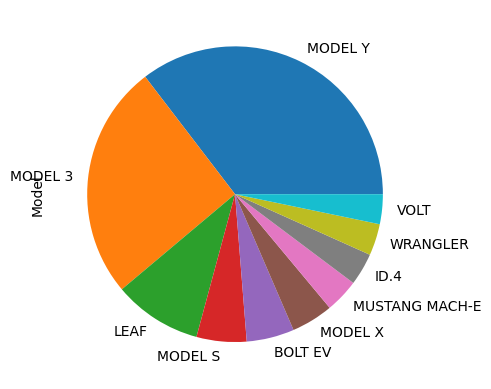

In [14]:
Model = df["Model"].value_counts().nlargest(10)
Model
Model.plot.pie()

In [13]:
df['Model'].unique()

array(['MODEL 3', 'MODEL Y', 'MODEL S', 'CX-90', 'LEAF', 'KONA', 'S60',
       'VOLT', 'PRIUS PRIME', 'MODEL X', 'NX', 'F-150', 'C40', 'ARIYA',
       'XC90', 'X5', 'I3', 'AVIATOR', 'RAV4 PRIME', 'SPORTAGE', 'BOLT EV',
       'Q5 E', '500', 'XC60', 'WRANGLER', 'ESCAPE', 'I8', 'FUSION', 'R1S',
       'HORNET', 'RX', 'SOLTERRA', 'EV9', '330E', 'TUCSON', 'NIRO', 'I4',
       'BZ4X', 'PACIFICA', 'Q5', 'IONIQ 5', 'R1T', 'FOCUS', 'C-MAX', 'Q6',
       'EV6', 'IX', 'PS2', 'CLARITY', 'EQB-CLASS', 'SORENTO', 'CORSAIR',
       'OUTLANDER', 'TRANSIT', 'E-TRON', 'OPTIMA', 'ID.4', 'RANGE ROVER',
       'SOUL', 'HARDTOP', 'GRAND CHEROKEE', 'RAV4 PHEV', 'E-GOLF', 'RZ',
       'CYBERTRUCK', 'A3', 'PRIUS PHEV', '745LE', 'AIR', 'CAYENNE',
       'XC40', 'SPARK', 'EQS-CLASS SUV', 'I5', '530E', 'IONIQ 6',
       'E-TRON SPORTBACK', 'FORTWO ELECTRIC DRIVE', 'EDV', 'BLAZER',
       'TAYCAN', 'Q4', 'SANTA FE', 'COUNTRYMAN', 'RANGE ROVER SPORT',
       'GV60', 'PROLOGUE', 'LYRIQ', 'GLC-CLASS', 'BOLT EUV',
   

In [15]:
df['Make'].unique()

array(['TESLA', 'MAZDA', 'NISSAN', 'HYUNDAI', 'VOLVO', 'CHEVROLET',
       'TOYOTA', 'LEXUS', 'FORD', 'BMW', 'LINCOLN', 'KIA', 'AUDI', 'FIAT',
       'JEEP', 'RIVIAN', 'DODGE', 'SUBARU', 'CHRYSLER', 'POLESTAR',
       'HONDA', 'MERCEDES-BENZ', 'MITSUBISHI', 'VOLKSWAGEN', 'LAND ROVER',
       'MINI', 'LUCID', 'PORSCHE', 'SMART', 'GENESIS', 'CADILLAC', 'GMC',
       'JAGUAR', 'ACURA', 'FISKER', 'ALFA ROMEO', 'VINFAST', 'TH!NK',
       'MULLEN AUTOMOTIVE INC.', 'BRIGHTDROP', 'LAMBORGHINI', 'BENTLEY',
       'ROLLS-ROYCE', 'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'RAM'],
      dtype=object)

##### Distribution of electric vehicle type

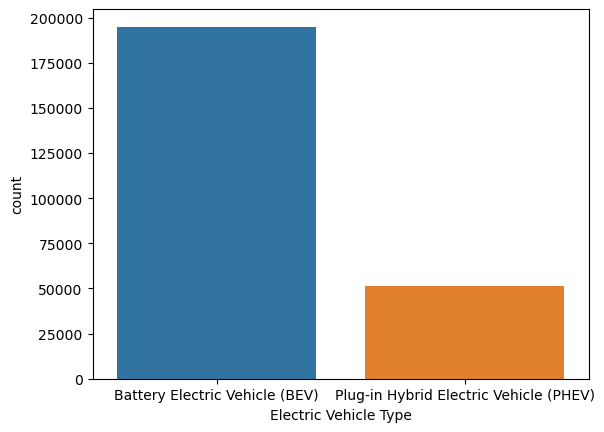

In [16]:
# Distribution of electric vehicle type
sns.countplot(data=df, x='Electric Vehicle Type')
plt.show()

#### The percentage of BEV vs PHEV 

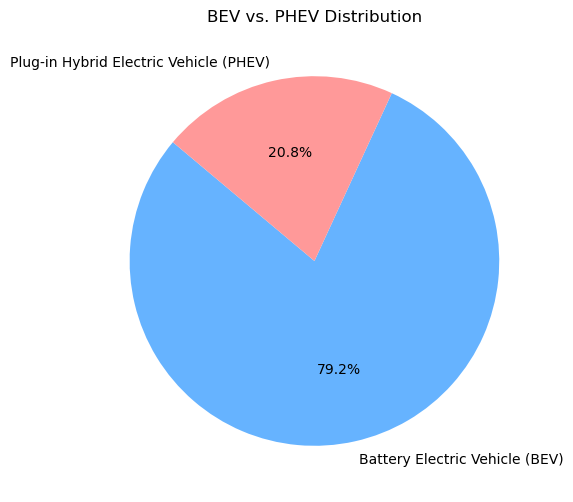

In [17]:
# Count of vehicle types
ev_types = df["Electric Vehicle Type"].value_counts()
# Plot
plt.figure(figsize=(6, 6))
plt.pie(ev_types.values, labels=ev_types.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"], startangle=140)
plt.title("BEV vs. PHEV Distribution")
plt.show()


#### The percentage of Battery Electric Vehicles (BEVs) is 79.2 % and Plug-in Hybrid Electric Vehicles (PHEVs) is 20.8 % 

#### BEV vs PHEV percentages for the top 10 companies (makes)

In [52]:
import plotly.express as px
import pandas as pd

# Get top 10 companies by vehicle count
top_10_companies = df['Make'].value_counts().nlargest(10).index

# Create a list to store data
data_list = []

# Loop through each company and compute BEV/PHEV counts
for make in top_10_companies:
    subset = df[df['Make'] == make]
    type_counts = subset['Electric Vehicle Type'].value_counts(normalize=True) * 100  # percentage
    
    for ev_type, percent in type_counts.items():
        data_list.append({'Make': make, 'EV Type': ev_type, 'Percentage': percent})

# Convert list to DataFrame
bar_df = pd.DataFrame(data_list)

# Plot grouped bar chart
fig = px.bar(
    bar_df,
    x='Make',
    y='Percentage',
    color='EV Type',
    barmode='group',
    title='BEV vs PHEV Percentage by Top 10 Vehicle Manufacturers',
    text=bar_df['Percentage'].round(1)
)

fig.update_layout(
    xaxis_title="Vehicle Manufacturer (Make)",
    yaxis_title="Percentage (%)",
    legend_title="Electric Vehicle Type",
    height=600
)
fig.update_traces(textposition='outside')

fig.show()

#### Tesla, Nissan, and Rivian produce 100% battery electric vehicles (BEVs), while Jeep manufactures 99.3% BEVs. The top 10 automakers are shifting their focus toward producing more BEVs than plug-in hybrid electric vehicles (PHEVs). Chevrolet, Ford, and Kia produce approximately 70% BEVs and 30% PHEVs. Hyundai's production is about 85% BEVs, whereas Toyota produces around 15 % BEVs and 85% PHEVs..

#### Top 10 Cities with the Most Electric Vehicles

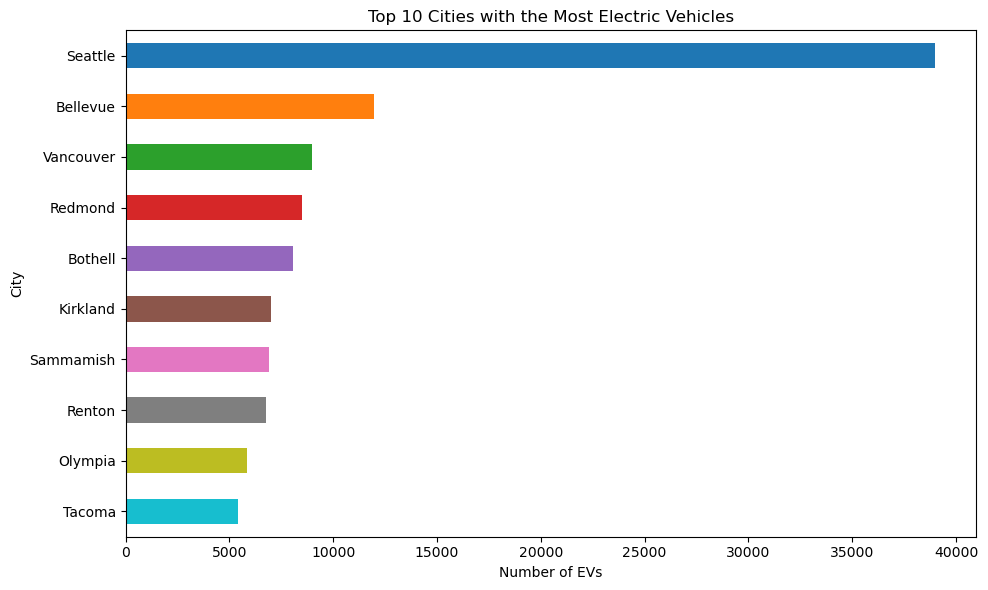

In [53]:

# Top 10 cities by EV count
top_cities = df["City"].value_counts().head(10)

# Define a colormap or a list of colors (optional: use plt.cm for more variety)
colors = plt.cm.tab10(range(len(top_cities)))  # 10 distinct colors

# Plot
plt.figure(figsize=(10, 6))
top_cities.plot(kind="barh", color=colors)
plt.xlabel("Number of EVs")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Electric Vehicles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Seattle has the highest number of electric vehicles (EVs) at around 40,000, highlighting its leadership in EV adoption. Other cities such as Bellevue, Vancouver, Redmond, Kirkland, and Olympia follow with lower but notable numbers, ranging from 6,000 to 13,000 EVs, showing growing adoption across the region.

#### How EV adoption changed over the years?
#### EV adoption trends from 1999 to 2024

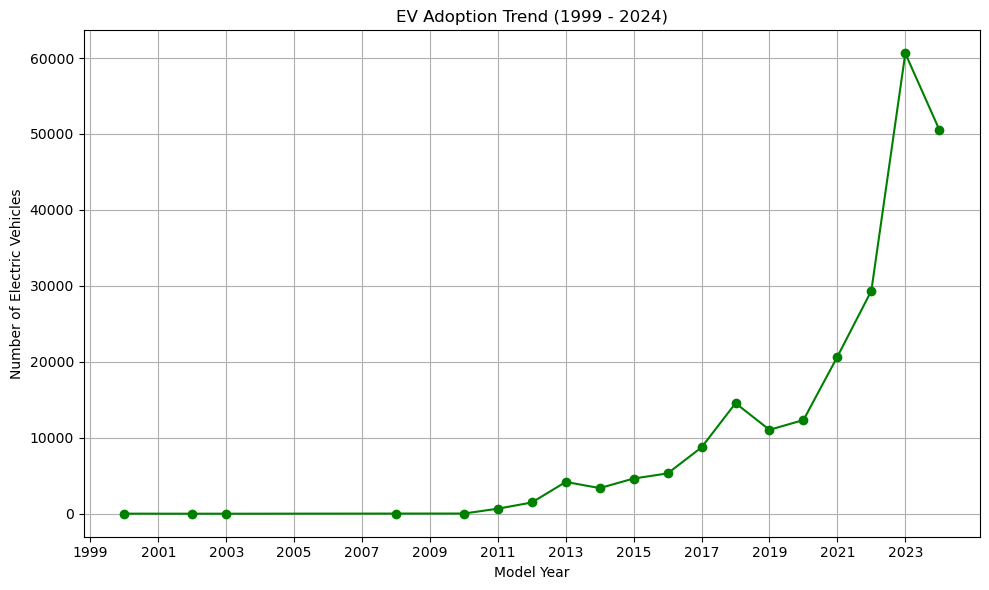

In [54]:
# Filter data for years between 1999 and 2024
yearly_ev_counts = df[(df["Model Year"] >= 1999) & (df["Model Year"] <= 2024)] \
                    .groupby("Model Year").size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_ev_counts.index, yearly_ev_counts.values, marker='o', linestyle='-', color='green')
plt.title("EV Adoption Trend (1999 - 2024)")
plt.xlabel("Model Year")
plt.ylabel("Number of Electric Vehicles")
plt.grid(True)
plt.xticks(range(1999, 2025, 2))  # Tick every 2 years
plt.tight_layout()
plt.show()

#### From 1999 to 2010, EV adoption remained minimal, but beginning in 2011, the number of electric vehicles steadily increased, peaking around 2018. Despite a slight dip in 2019, the overall trend from 2010 to 2023 shows a sixfold growth in EV adoption, rising from approximately 10,000 to 60,000 vehicles.

#### The electric range across different manufacturers

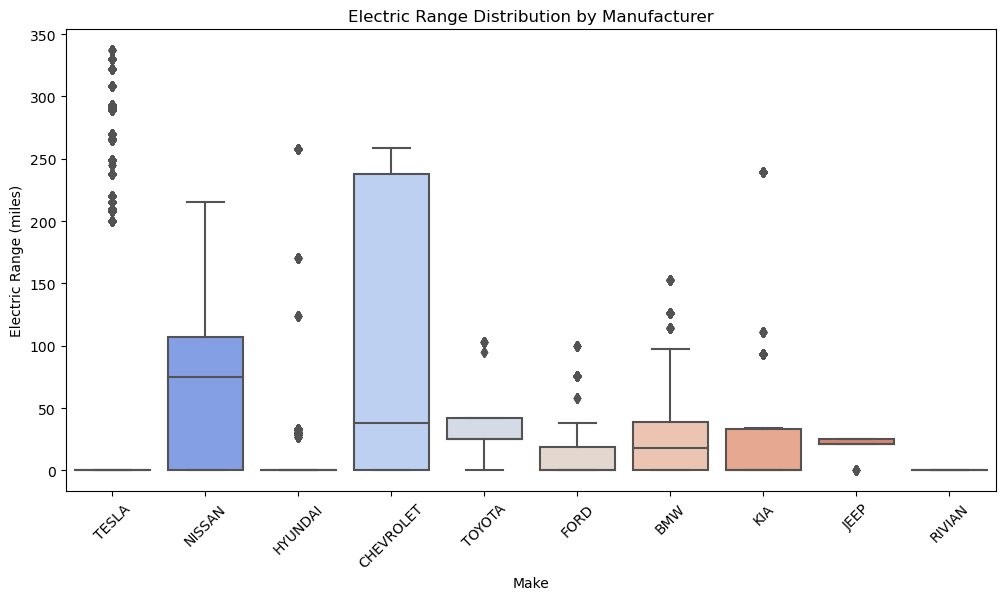

In [18]:
# To compare the electric range across different manufacturers:
# Boxplot of Electric Range by Make (Top 10 makes)
top_makes_list = df["Make"].value_counts().head(10).index
df_filtered = df[df["Make"].isin(top_makes_list)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Make", y="Electric Range", data=df_filtered, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Electric Range Distribution by Manufacturer")
plt.ylabel("Electric Range (miles)")
plt.show()

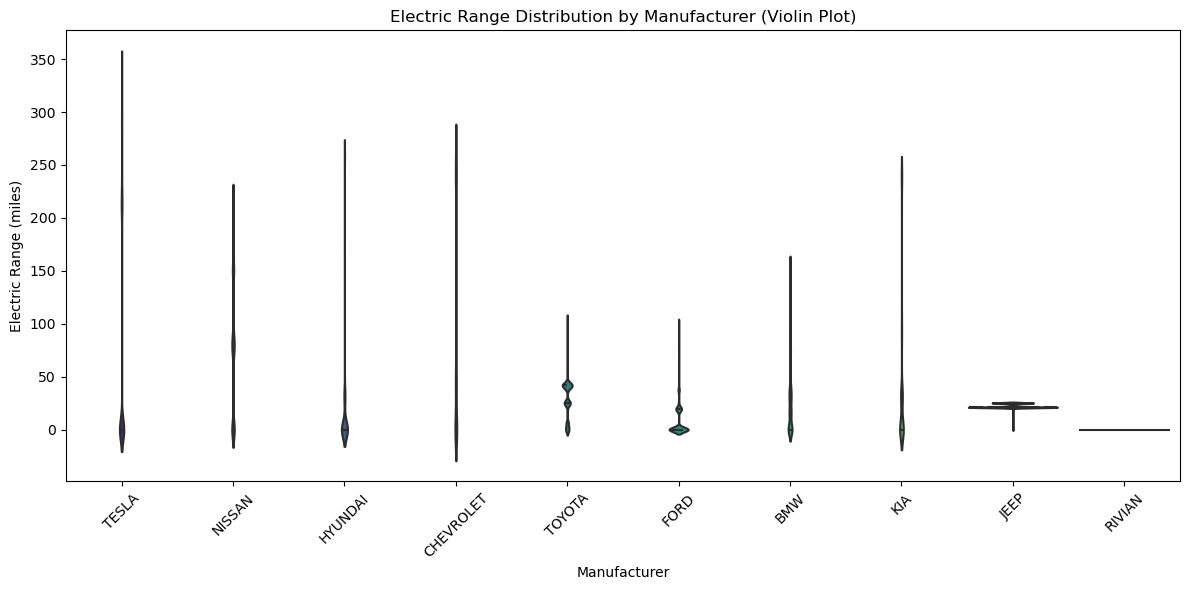

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for top 10 makes by frequency
top_makes_list = df["Make"].value_counts().head(10).index
df_filtered = df[df["Make"].isin(top_makes_list)]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Make", y="Electric Range", data=df_filtered, palette="viridis", inner="quartile")
plt.xticks(rotation=45)
plt.title("Electric Range Distribution by Manufacturer (Violin Plot)")
plt.ylabel("Electric Range (miles)")
plt.xlabel("Manufacturer")
plt.tight_layout()
plt.show()

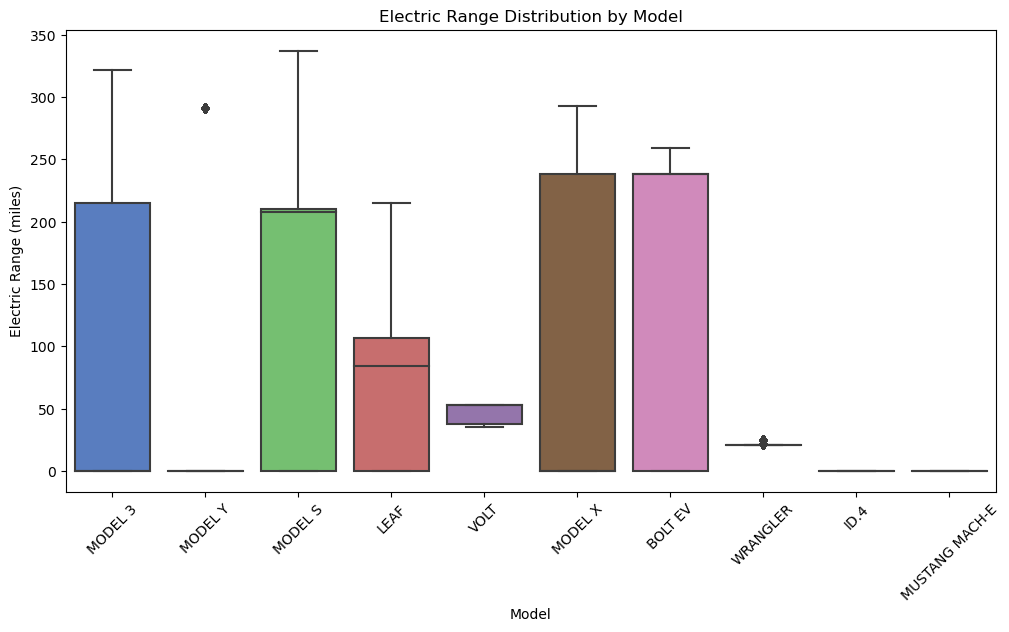

In [5]:
# To check electric range by specific models:
top_models = df["Model"].value_counts().head(10).index
df_models = df[df["Model"].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Electric Range", data=df_models, palette="muted")
plt.xticks(rotation=45)
plt.title("Electric Range Distribution by Model")
plt.ylabel("Electric Range (miles)")
plt.show()

In [9]:
import plotly.express as px

# Calculate mean electric range by model
mean_range = df_models.groupby("Model", as_index=False)["Electric Range"].mean()

# Sort by mean electric range
mean_range = mean_range.sort_values("Electric Range", ascending=True)

# Plot
fig = px.bar(mean_range,
             x="Electric Range",
             y="Model",
             orientation='h',
             title="Average Electric Range by Top 10 Models",
             labels={"Electric Range": "Mean Electric Range (miles)", "Model": "Car Model"},
             color="Electric Range",
             color_continuous_scale="Reds")

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()


In [12]:
df["Make_Model"] = df["Make"] + " " + df["Model"]

# Optionally: Get top 15 most common combinations
top_combos = df["Make_Model"].value_counts().head(11).index
df_combo = df[df["Make_Model"].isin(top_combos)]

In [13]:
import plotly.express as px

# Compute mean electric range
mean_range_combo = df_combo.groupby("Make_Model", as_index=False)["Electric Range"].mean()
mean_range_combo = mean_range_combo.sort_values("Electric Range", ascending=True)

# Plot
fig = px.bar(mean_range_combo,
             x="Electric Range",
             y="Make_Model",
             orientation='h',
             title="Average Electric Range by Make + Model",
             labels={"Electric Range": "Mean Electric Range (miles)", "Make_Model": "Make + Model"},
             color="Electric Range",
             color_continuous_scale="Viridis")

fig.update_layout(yaxis=dict(categoryorder='total ascending'), height=600)
fig.show()

#### To check which cities have the highest EV adoption

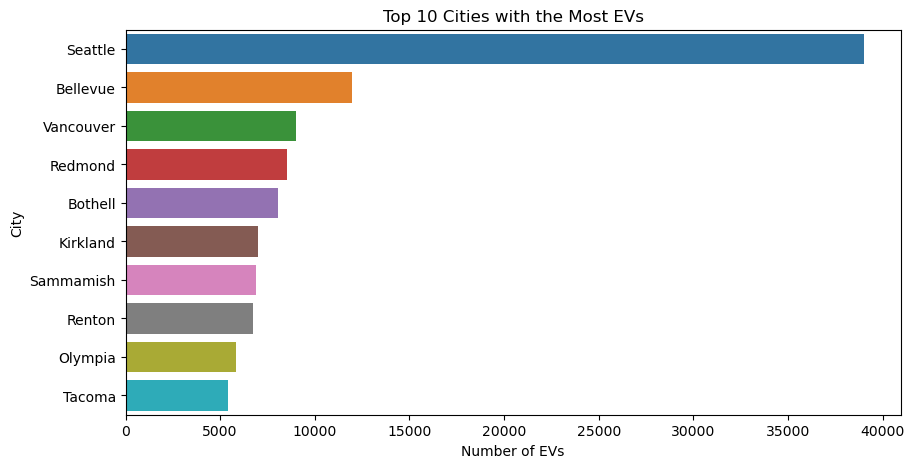

In [14]:
# To check which cities have the highest EV adoption:
# Top 10 cities with the most EVs
top_cities = df["City"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.xlabel("Number of EVs")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most EVs")
plt.show()

##### Seattle leads in EV adoption with around 40,000 vehicles due to its strong infrastructure, environmental initiatives, and higher urban population density. Bellevue and Vancouver follow, likely benefiting from proximity to Seattle and similar socioeconomic and policy support for sustainable transportation. Cities like Redmond, Bothell, Renton, and Kirkland also show significant EV presence (5,000–8,000), reflecting regional growth, tech industry influence, and expanding charging networks

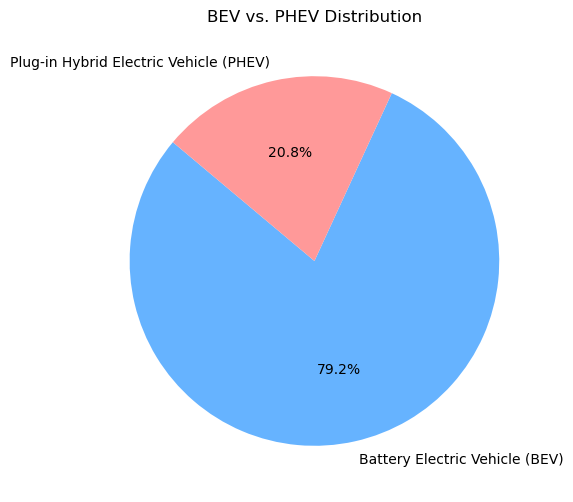

In [36]:
# What percentage of EVs are PHEVs vs. BEVs?
# To find the distribution of Battery Electric Vehicles (BEVs) vs. Plug-in Hybrid Electric Vehicles (PHEVs):
# Count of vehicle types
ev_types = df["Electric Vehicle Type"].value_counts()
# Plot
plt.figure(figsize=(6, 6))
plt.pie(ev_types.values, labels=ev_types.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"], startangle=140)
plt.title("BEV vs. PHEV Distribution")
plt.show()

In [18]:
# Predict Future EV Adoption Using Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [19]:
# Aggregate number of EVs per year
ev_growth = df.groupby('Model Year').size().reset_index(name='EV Count')
ev_growth

Model Year  EV Count
0         2000         8
1         2002         2
2         2003         1
3         2008        18
4         2010        23
5         2011       663
6         2012      1478
7         2013      4185
8         2014      3374
9         2015      4634
10        2016      5308
11        2017      8739
12        2018     14553
13        2019     11047
14        2020     12336
15        2021     20674
16        2022     29359
17        2023     60619
18        2024     50578
19        2025     18036
20        2026       502

c:\Users\farha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



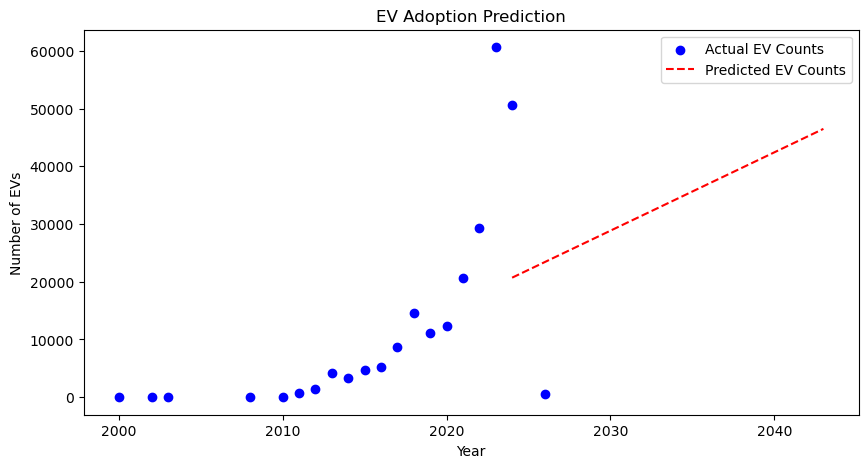

In [20]:
ev_growth = df[df['Model Year'] != 2025].groupby('Model Year').size().reset_index(name='EV Count')

# Prepare data for regression
X = ev_growth[['Model Year']]
y = ev_growth['EV Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Future EV Adoption
future_years = np.array(range(2024, 2044)).reshape(-1, 1)  # Predict for next 10 years
future_predictions = model.predict(future_years)

# Plot Results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual EV Counts")
plt.plot(future_years, future_predictions, color='red', linestyle='dashed', label="Predicted EV Counts")
plt.xlabel("Year")
plt.ylabel("Number of EVs")
plt.title("EV Adoption Prediction")
plt.legend()
plt.show()

c:\Users\farha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



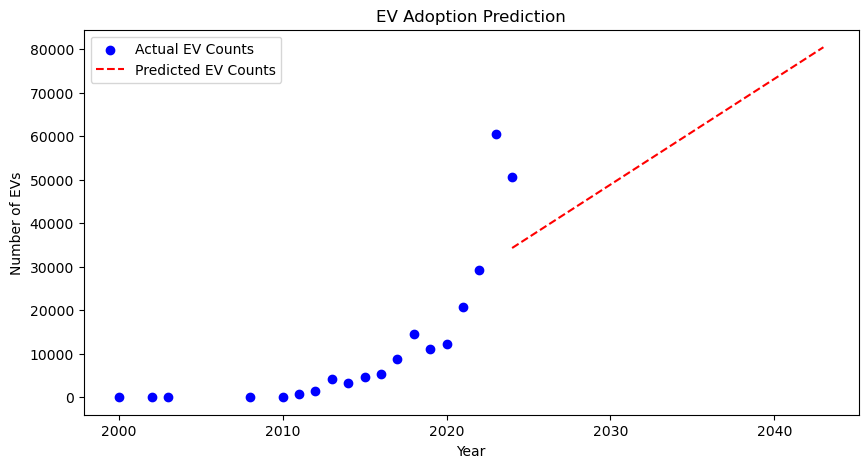

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Exclude years 2025 and 2026 from historical data
ev_growth = df[~df['Model Year'].isin([2025, 2026])].groupby('Model Year').size().reset_index(name='EV Count')

# Prepare data for regression
X = ev_growth[['Model Year']]
y = ev_growth['EV Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Future EV Adoption (excluding 2025 and 2026)
future_years = np.array([year for year in range(2024, 2044) if year not in [2025, 2026]]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot Results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual EV Counts")
plt.plot(future_years, future_predictions, color='red', linestyle='dashed', label="Predicted EV Counts")
plt.xlabel("Year")
plt.ylabel("Number of EVs")
plt.title("EV Adoption Prediction")
plt.legend()
plt.show()


The red dashed line represents the predicted EV adoption trend.
the curve is steep, EV adoption is accelerating.

In [40]:
ev_growth = df[df['Model Year'] != 2025].groupby('Model Year').size().reset_index(name='EV Count')
ev_growth

Model Year  EV Count
0         2000         8
1         2002         2
2         2003         1
3         2008        18
4         2010        23
5         2011       663
6         2012      1478
7         2013      4185
8         2014      3374
9         2015      4634
10        2016      5308
11        2017      8739
12        2018     14553
13        2019     11047
14        2020     12336
15        2021     20674
16        2022     29359
17        2023     60619
18        2024     50578
19        2026       502

Find Relationships Between Electric Range and Vehicle Make/Model
We will use scatter plots and correlation analysis to explore how electric range varies across different manufacturers.

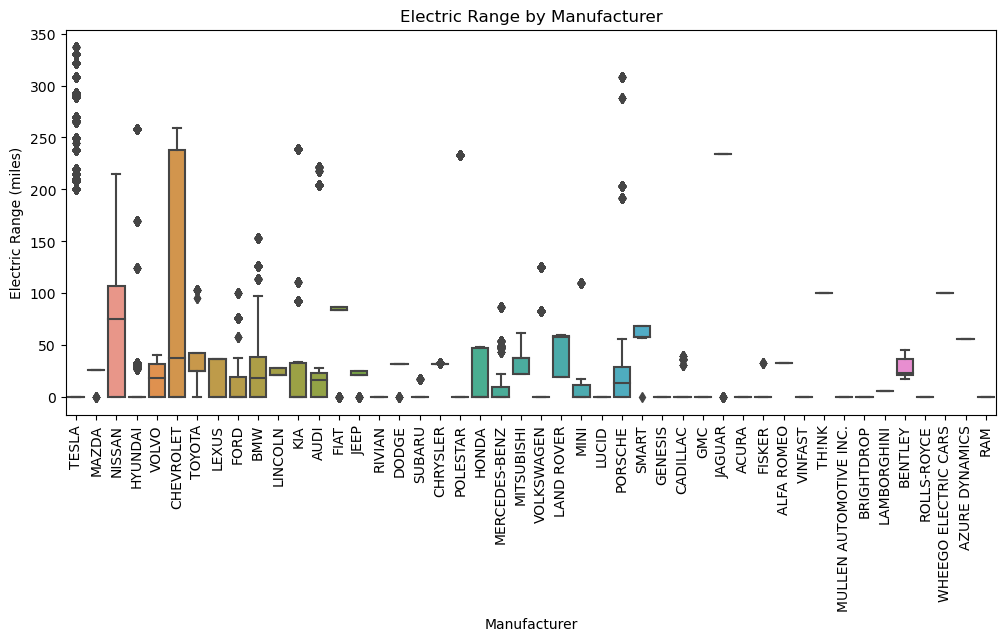

In [41]:
# Plot range vs. make/model
plt.figure(figsize=(12, 5))
sns.boxplot(x='Make', y='Electric Range', data=df)
plt.xticks(rotation=45)
plt.xlabel("Manufacturer")
plt.ylabel("Electric Range (miles)")
plt.title("Electric Range by Manufacturer")
plt.xticks(rotation=90)
plt.show()

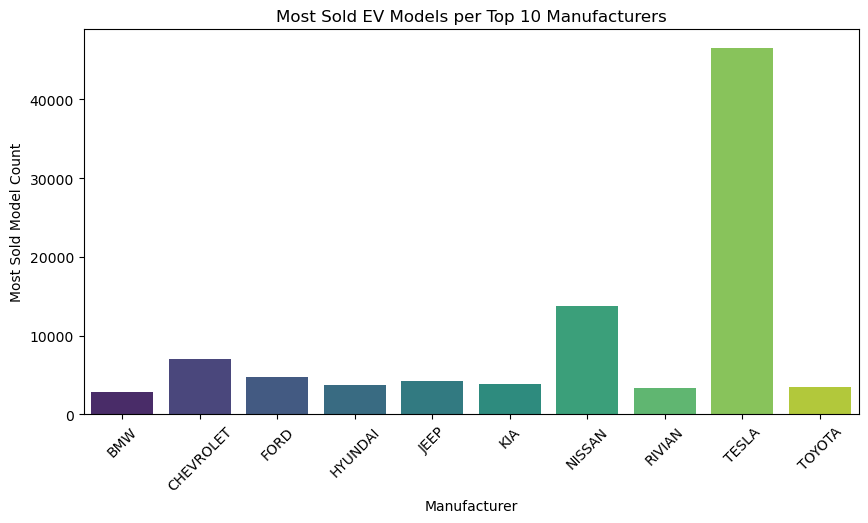

        Make           Model
0        BMW              X5
1  CHEVROLET         BOLT EV
2       FORD  MUSTANG MACH-E
3    HYUNDAI         IONIQ 5
4       JEEP        WRANGLER
5        KIA            NIRO
6     NISSAN            LEAF
7     RIVIAN             R1S
8      TESLA         MODEL Y
9     TOYOTA      RAV4 PRIME


In [148]:
# Step 1: Find the top 10 manufacturers by count
top_makes = df["Make"].value_counts().head(10).index

# Step 2: Find the most sold model for each of the top 10 manufacturers
top_models = df[df["Make"].isin(top_makes)].groupby("Make")["Model"].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Step 3: Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_models["Make"], y=top_models["Model"].map(lambda x: df[df["Model"] == x].shape[0]), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Manufacturer")
plt.ylabel("Most Sold Model Count")
plt.title("Most Sold EV Models per Top 10 Manufacturers")

# Show the plot
plt.show()

# Display the result as a table
print(top_models)

              Manufacturer           Most Sold Model  Count
39                   TESLA                   MODEL Y  46583
31                  NISSAN                      LEAF  13735
8                CHEVROLET                   BOLT EV   7008
13                    FORD            MUSTANG MACH-E   4774
43              VOLKSWAGEN                      ID.4   4653
19                    JEEP                  WRANGLER   4292
20                     KIA                      NIRO   3861
9                 CHRYSLER                  PACIFICA   3733
17                 HYUNDAI                   IONIQ 5   3729
41                  TOYOTA                RAV4 PRIME   3515
35                  RIVIAN                       R1S   3343
5                      BMW                        X5   2813
44                   VOLVO                      XC90   1912
38                  SUBARU                  SOLTERRA   1737
32                POLESTAR                       PS2   1187
2                     AUDI              

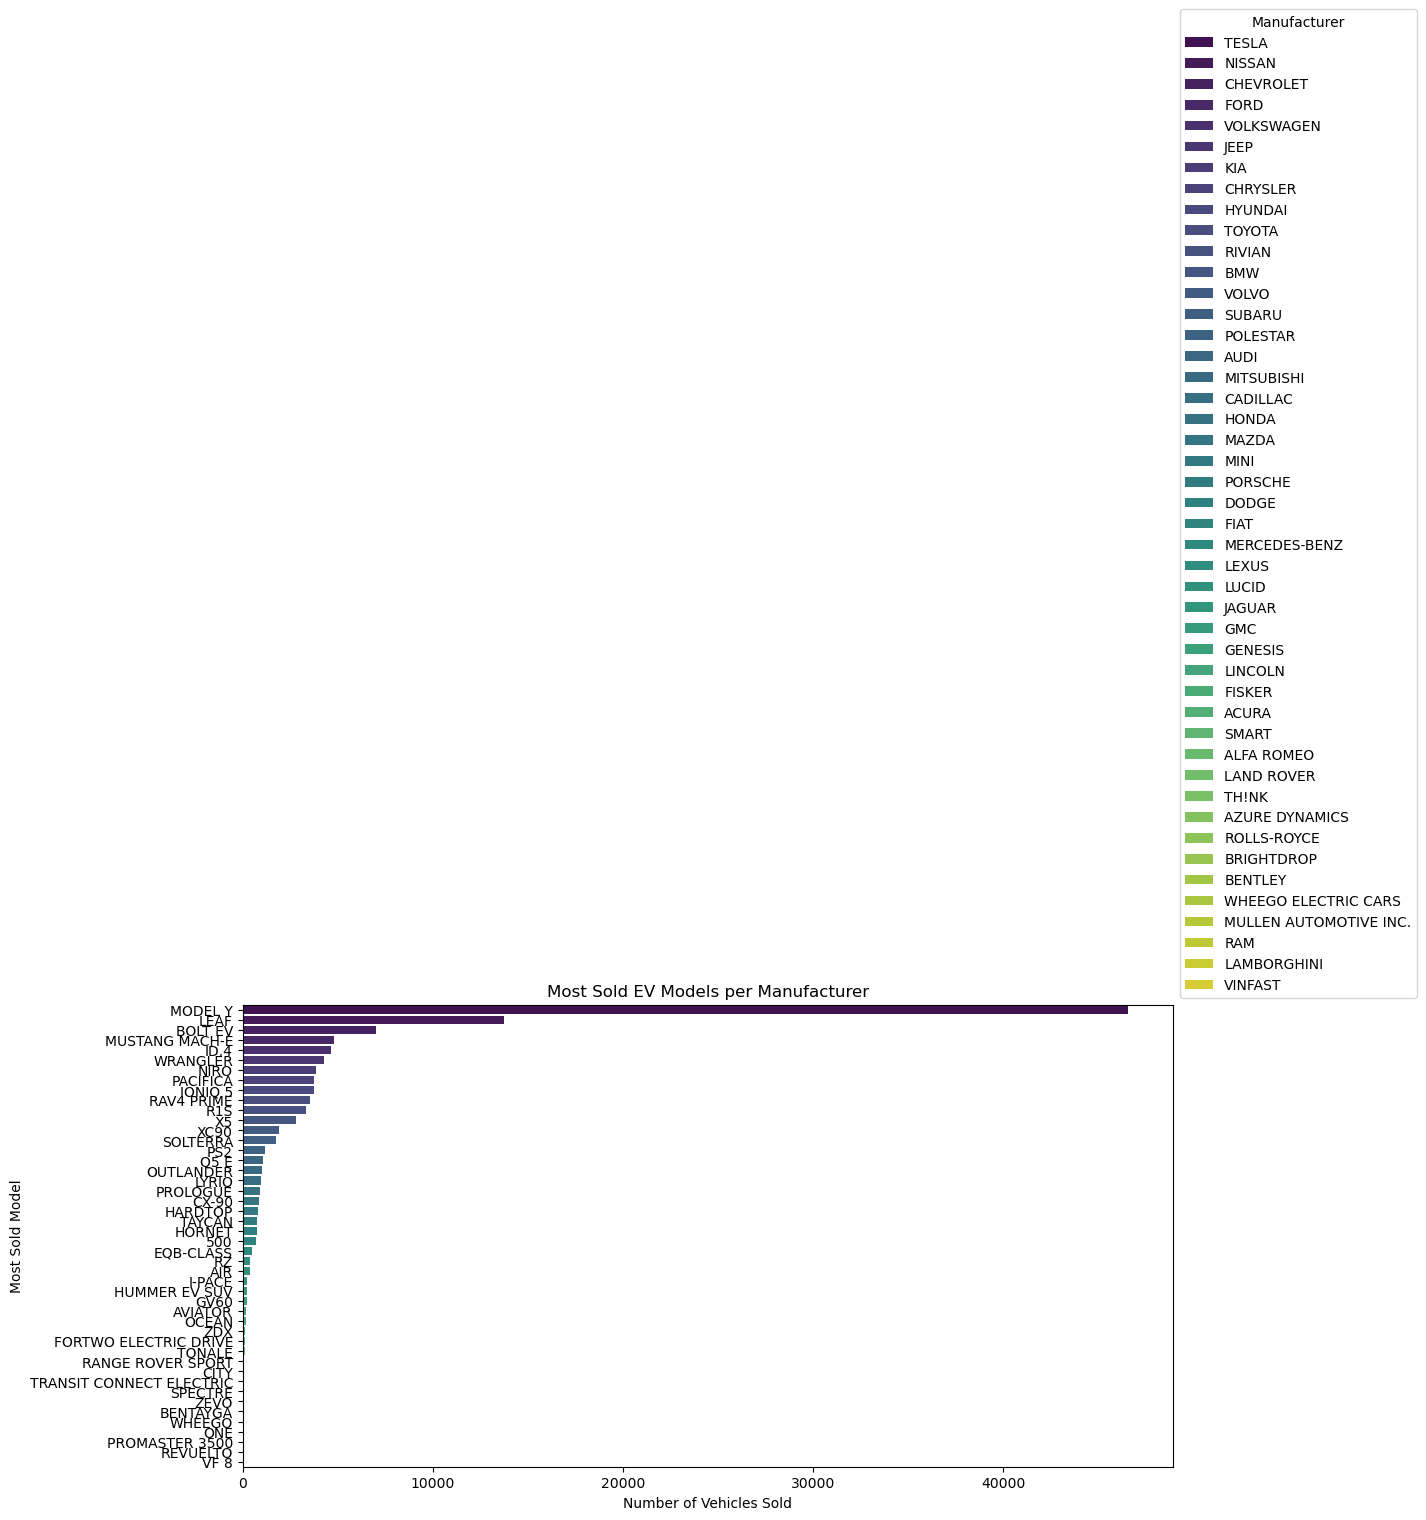

In [149]:
# Step 1: Find the most sold model for each manufacturer
most_sold_models = df.groupby("Make")["Model"].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_sold_models.columns = ["Manufacturer", "Most Sold Model"]

# Step 2: Count how many times each "Most Sold Model" appears in the dataset
most_sold_models["Count"] = most_sold_models["Most Sold Model"].map(lambda x: df[df["Model"] == x].shape[0])

# Step 3: Sort the result by the highest count (optional)
most_sold_models = most_sold_models.sort_values(by="Count", ascending=False)

# Display the result as a table
print(most_sold_models)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=most_sold_models["Most Sold Model"], x=most_sold_models["Count"], hue=most_sold_models["Manufacturer"], dodge=False, palette="viridis")

# Labels and title
plt.xlabel("Number of Vehicles Sold")
plt.ylabel("Most Sold Model")
plt.title("Most Sold EV Models per Manufacturer")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Top 10 manufacturers and their most sold EV Models

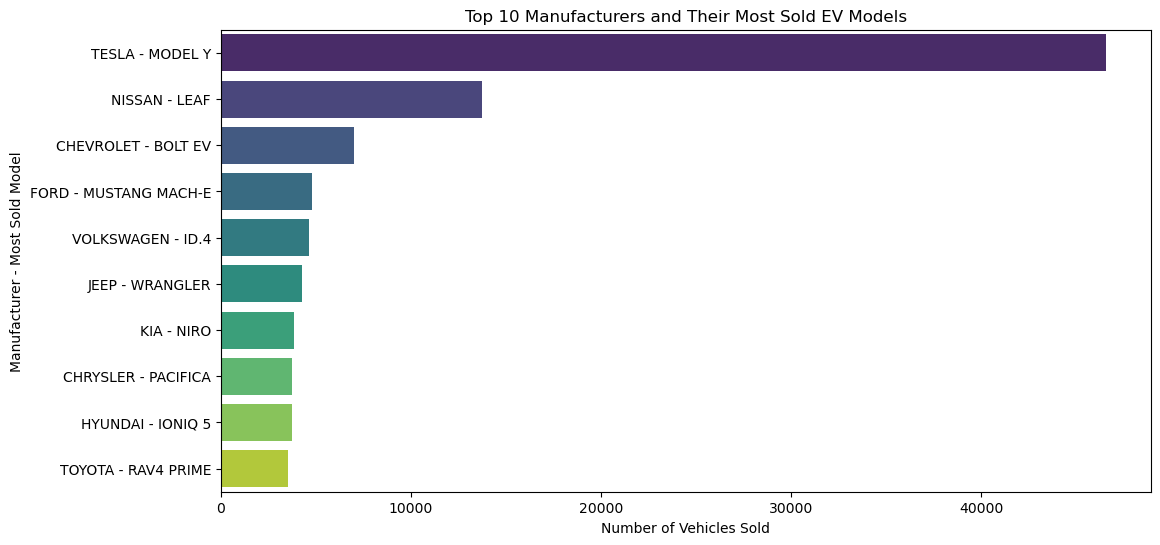

In [150]:
# Step 1: Find the most sold model for each manufacturer
most_sold_models = df.groupby("Make")["Model"].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_sold_models.columns = ["Manufacturer", "Most Sold Model"]

# Step 2: Count how many times each "Most Sold Model" appears in the dataset
most_sold_models["Count"] = most_sold_models["Most Sold Model"].map(lambda x: df[df["Model"] == x].shape[0])

# Step 3: Sort by highest count and take the top 10 manufacturers
top_10 = most_sold_models.sort_values(by="Count", ascending=False).head(10)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10["Manufacturer"] + " - " + top_10["Most Sold Model"], x=top_10["Count"], palette="viridis")

# Labels and title
plt.xlabel("Number of Vehicles Sold")
plt.ylabel("Manufacturer - Most Sold Model")
plt.title("Top 10 Manufacturers and Their Most Sold EV Models")

# Show the plot
plt.show()

## Number of Unique EV Models by all Manufacturers (Last 10 Years)

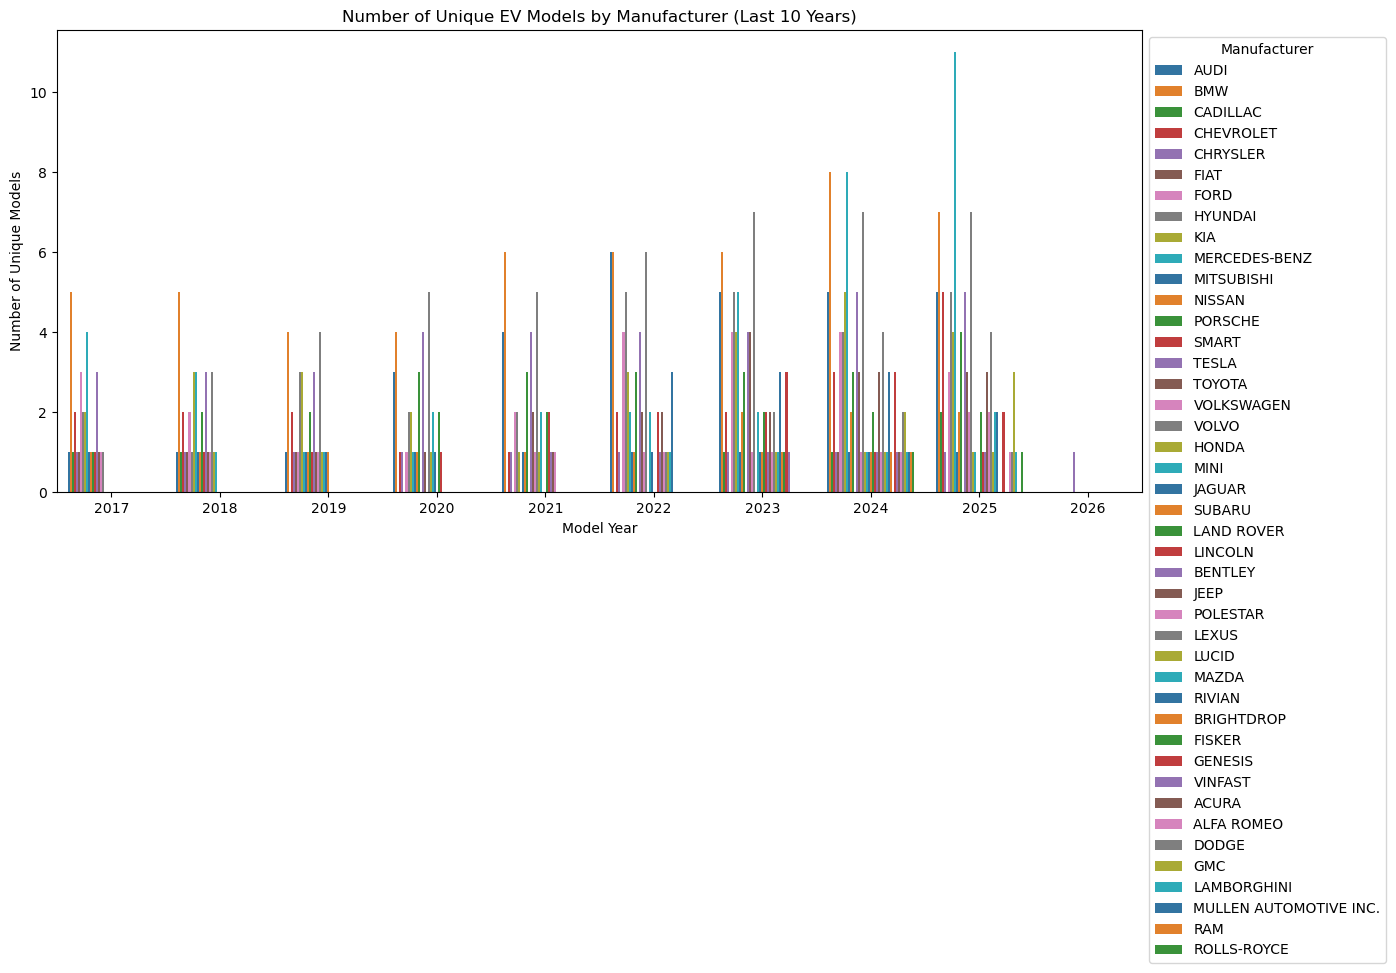

In [26]:
# Step 1: Filter dataset for the last 10 years
last_10_years = df[df["Model Year"] >= (df["Model Year"].max() - 9)]

# Step 2: Count unique models per manufacturer per year
model_count = last_10_years.groupby(["Model Year", "Make"])["Model"].nunique().reset_index()

# Step 3: Plot the data using a bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=model_count, x="Model Year", y="Model", hue="Make", palette="tab10")

# Labels and title
plt.xlabel("Model Year")
plt.ylabel("Number of Unique Models")
plt.title("Number of Unique EV Models by Manufacturer (Last 10 Years)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))  # Move legend outside

# Show the plot
plt.show()

## Top 5 Manufacturers by Unique EV Models (Last 10 Years)

In [7]:
import plotly.express as px

# Step 1: Filter dataset for the last 10 years, excluding 2026
last_10_years = df[
    (df["Model Year"] >= (df["Model Year"].max() - 9)) &
    (df["Model Year"] != 2026)
]

# Step 2: Count unique models per manufacturer per year
model_count = last_10_years.groupby(["Model Year", "Make"])["Model"].nunique().reset_index()
model_count.columns = ['Model Year', 'Manufacturer', 'Unique Models']

# Step 3: Get top 5 manufacturers by total unique models in the period
top_5_makes = (
    model_count.groupby("Manufacturer")["Unique Models"]
    .sum()
    .nlargest(5)
    .index
)

# Step 4: Filter dataset for only the top 5 manufacturers
filtered_model_count = model_count[model_count["Manufacturer"].isin(top_5_makes)]

# Step 5: Plot with Plotly
fig = px.bar(filtered_model_count,
             x="Model Year",
             y="Unique Models",
             color="Manufacturer",
             title="Top 5 Manufacturers by Unique EV Models (Last 10 Years)",
             labels={"Unique Models": "Number of Unique Models"},
             barmode="stack",
             height=500)

fig.update_layout(xaxis=dict(type='category'), legend_title_text="Manufacturer")
fig.show()

## Total number of EVs by top 10 Manufacturer in last 10 years

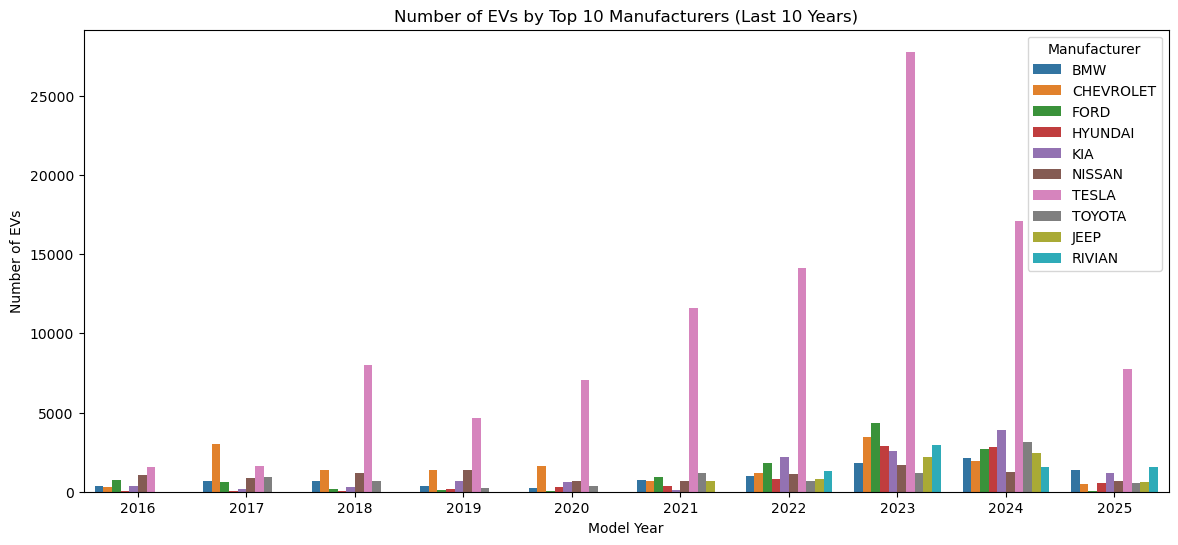

In [9]:
# Step 1: Remove the year 2026
df_filtered = df[df["Model Year"] != 2026]

# Step 2: Identify top 10 manufacturers by number of EVs
top_10_makes = df_filtered["Make"].value_counts().head(10).index

# Step 3: Filter data for only these top 10 manufacturers and the last 10 years
last_10_years = df_filtered[df_filtered["Model Year"] >= (df_filtered["Model Year"].max() - 9)]
filtered_data = last_10_years[last_10_years["Make"].isin(top_10_makes)]

# Step 4: Count total EVs per manufacturer per year
ev_count = filtered_data.groupby(["Model Year", "Make"]).size().reset_index(name="EV Count")

# Step 5: Plot the data using a bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=ev_count, x="Model Year", y="EV Count", hue="Make")

# Labels and title
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.title("Number of EVs by Top 10 Manufacturers (Last 10 Years)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))  # Move legend outside

# Show the plot
plt.show()

## Total number of EVs by top 5 Manufacturer in last 10 years

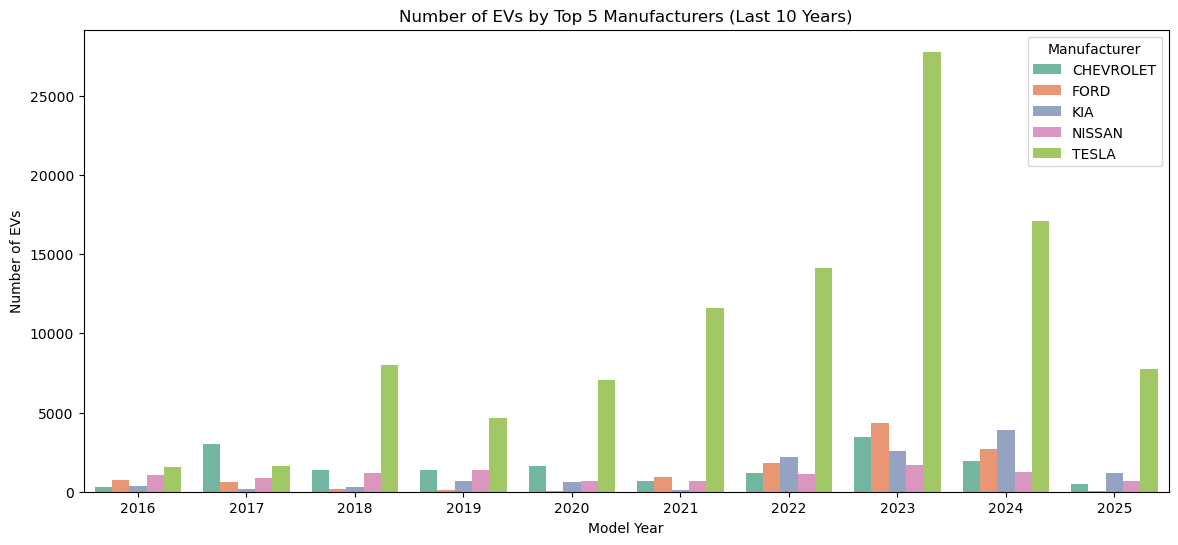

In [11]:
# Step 1: Remove the year 2026
df_filtered = df[df["Model Year"] != 2026]

# Step 2: Identify top 5 manufacturers by number of EVs
top_5_makes = df_filtered["Make"].value_counts().head(5).index

# Step 3: Filter data for only these top 5 manufacturers and the last 10 years
last_10_years = df_filtered[df_filtered["Model Year"] >= (df_filtered["Model Year"].max() - 9)]
filtered_data = last_10_years[last_10_years["Make"].isin(top_5_makes)]

# Step 4: Count total EVs per manufacturer per year
ev_count = filtered_data.groupby(["Model Year", "Make"]).size().reset_index(name="EV Count")

# Step 5: Plot the data using a bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=ev_count, x="Model Year", y="EV Count", hue="Make", palette="Set2")

# Labels and title
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.title("Number of EVs by Top 5 Manufacturers (Last 10 Years)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))  # Move legend outside

# Show the plot
plt.show()

#### Over the past decade, Tesla has overwhelmingly dominated the EV market, showing a fivefold increase in sales and consistently leading in adoption. Following Tesla, manufacturers like Ford, Kia, Chevrolet, and Nissan have also experienced steady growth, indicating broader industry momentum toward electrification. This trend highlights both Tesla’s market leadership and the increasing competitiveness among other top manufacturers

## To visualize the geographic spread of EVs in USA

In [25]:
# To visualize the geographic spread of EVs:
import folium
from folium.plugins import HeatMap

# Convert vehicle location coordinates (if available)
df["Longitude"] = df["Vehicle Location"].apply(lambda x: float(x.split()[1][1:]) if pd.notna(x) else None)
df["Latitude"] = df["Vehicle Location"].apply(lambda x: float(x.split()[2][:-1]) if pd.notna(x) else None)

# Drop NaN values
df_geo = df.dropna(subset=["Longitude", "Latitude"])

# Create map
ev_map = folium.Map(location=[47.5, -122.3], zoom_start=8)

# Add heatmap
HeatMap(df_geo[["Latitude", "Longitude"]].values).add_to(ev_map)

# Display the map
ev_map

## Count total EVs per state

WA    223521
CA       114
VA        59
MD        39
TX        30
NC        19
CO        17
GA        15
FL        15
IL        11
Name: State, dtype: int64


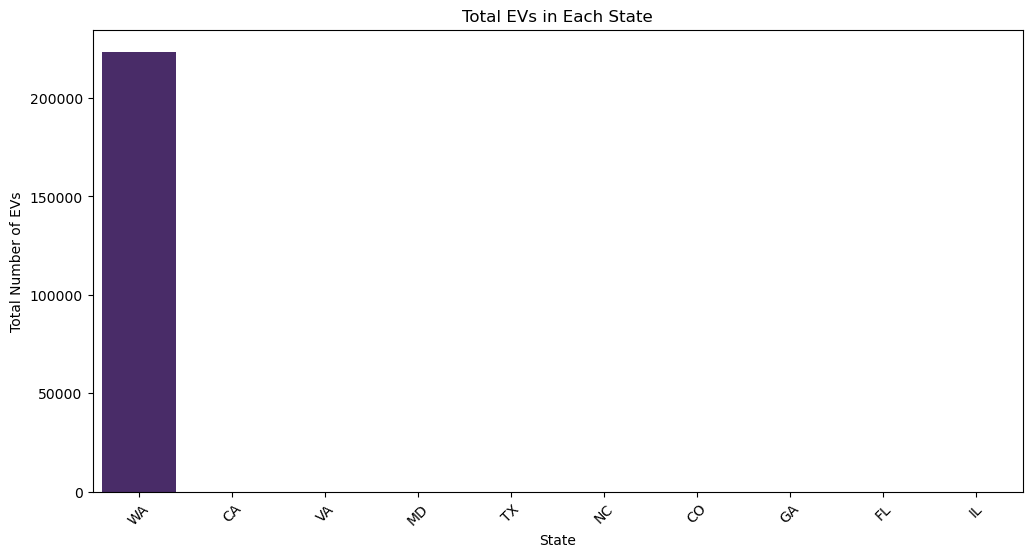

In [157]:
# Count total EVs per state
state_counts = df["State"].value_counts().head(10)

# Display results
print(state_counts)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")

# Labels and title
plt.xlabel("State")
plt.ylabel("Total Number of EVs")
plt.title("Total EVs in Each State")
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Washington leads the U.S. in electric vehicle (EV) adoption with approximately 22,000 EVs, followed by California with around 114. In contrast, all other states have significantly lower adoption, ranging from just 10 to 60 EVs, highlighting a strong regional concentration of EV usage.